<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [ ]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

##Data understanding

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<a id="2"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>


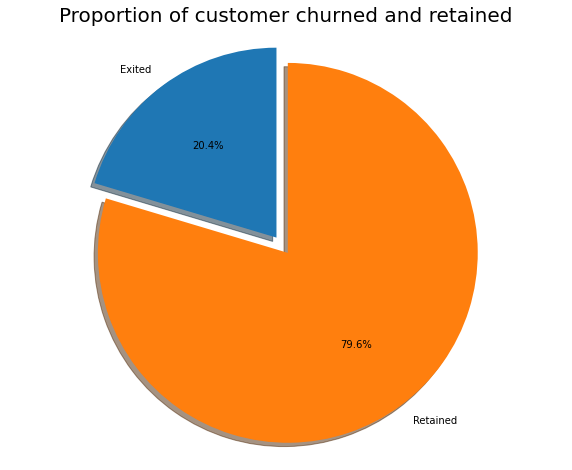

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

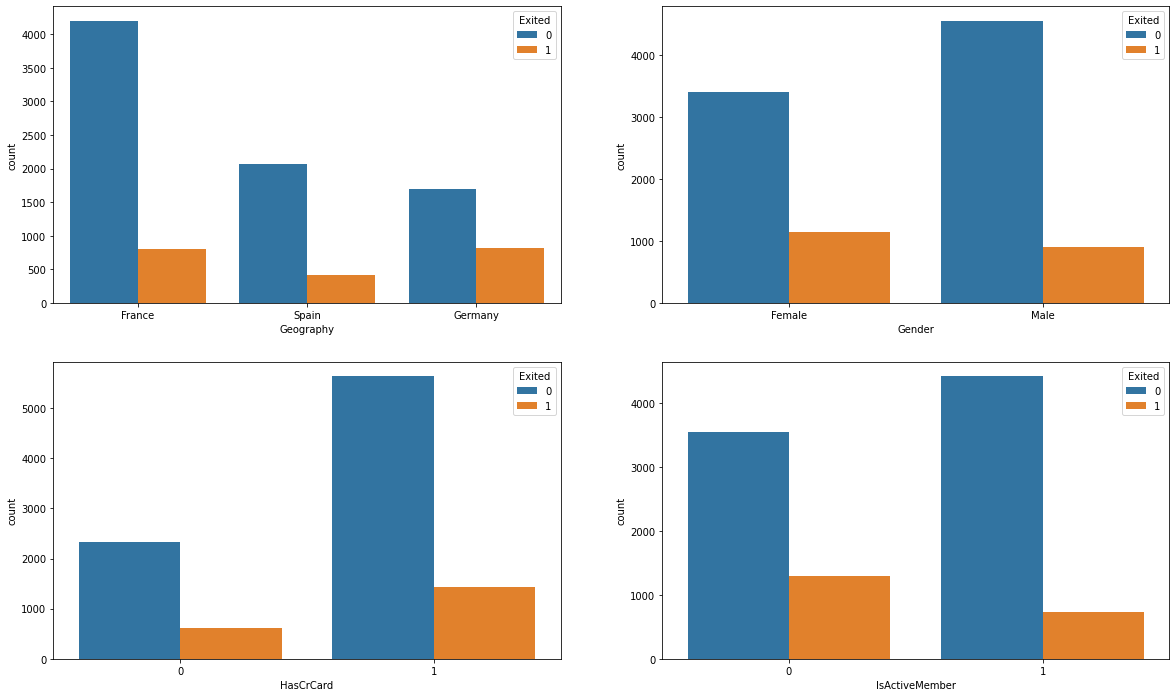

In [ ]:
fig , axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

##Train Test Split

In [ ]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

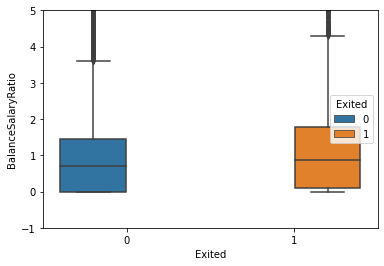

In [ ]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

(-1.0, 5.0)

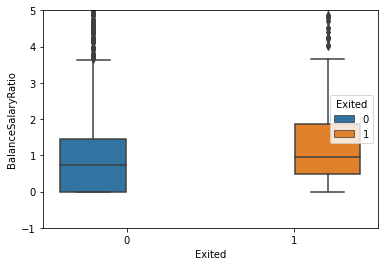

In [ ]:
df_test['BalanceSalaryRatio'] = df_test.Balance/df_test.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_test)
plt.ylim(-1, 5)

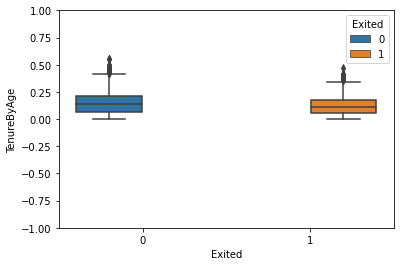

In [ ]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()


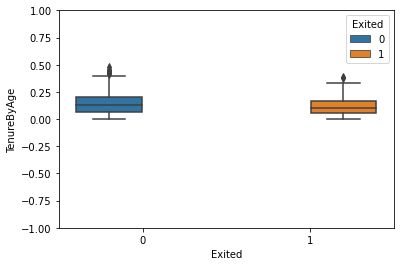

In [ ]:
df_test['TenureByAge'] = df_test.Tenure/(df_test.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_test)
plt.ylim(-1, 1)
plt.show()

In [ ]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [ ]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_test['CreditScoreGivenAge'] = df_test.CreditScore/(df_test.Age)

In [ ]:
df_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.759604,0.181818,14.659091
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,0.000000,0.375000,22.875000
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0,0.000000,0.133333,13.044444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9952,15763874,Ho,635,Spain,Male,46,8,0.00,2,1,1,60739.16,0,0.000000,0.173913,13.804348
9967,9968,15603794,Pugliesi,623,France,Male,48,5,118469.38,1,1,1,158590.25,0,0.747016,0.104167,12.979167
9969,9970,15806360,Hou,609,France,Male,41,6,0.00,1,0,1,112585.19,0,0.000000,0.146341,14.853659
9973,9974,15806455,Miller,611,France,Male,27,7,0.00,2,1,1,157474.10,0,0.000000,0.259259,22.629630


<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Preprocessing</h1>


In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[continuous_vars+ cat_vars  +  ['Exited']]
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female,0
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female,0
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female,0
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male,0
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male,0


In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_test = df_test[continuous_vars+ cat_vars  +  ['Exited']]
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female,1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female,0
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,0,Spain,Male,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,Spain,Female,0
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,0,0,Spain,Male,0


In [ ]:
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female,0
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female,0
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female,0
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male,0
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male,0


In [ ]:
df_test.loc[df_test.HasCrCard == 0, 'HasCrCard'] = -1
df_test.loc[df_test.IsActiveMember == 0, 'IsActiveMember'] = -1
df_test.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female,1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female,0
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,-1,Spain,Male,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,Spain,Female,0
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,-1,-1,Spain,Male,0


In [ ]:
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,0,1,-1,-1,1,-1
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,0,-1,1,-1,1,-1
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,0,-1,1,-1,1,-1
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,0,-1,-1,1,-1,1
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,0,-1,1,-1,-1,1


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_test[i].dtype == np.str or df_test[i].dtype == np.object):
        for j in df_test[i].unique():
            df_test[i+'_'+j] = np.where(df_test[i] == j,1,-1)
        remove.append(i)
df_test = df_test.drop(remove, axis=1)
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,1,-1,-1,1,-1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,1,-1,-1,1,-1
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,-1,1,-1,1,-1,-1,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,0,-1,1,-1,1,-1
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,-1,-1,0,-1,1,-1,-1,1


In [ ]:

swap_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Exited',
       'Geography_Spain', 'Geography_France', 'Geography_Germany',
       'Gender_Female', 'Gender_Male']
df_test = df_test.reindex(columns=swap_list)
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,1,-1,1,-1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,-1,1,-1,1,-1
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,-1,1,1,-1,-1,-1,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,0,1,-1,-1,1,-1
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,-1,-1,0,1,-1,-1,-1,1


In [ ]:
df_test['Exited'].value_counts()

0    1610
1     390
Name: Exited, dtype: int64

In [ ]:
##without scaling our values look like
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,0,1,-1,-1,1,-1
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,0,-1,1,-1,1,-1
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,0,-1,1,-1,1,-1
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,0,-1,-1,1,-1,1
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,0,-1,1,-1,-1,1


In [ ]:
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,0,1,-1,-1,1,-1
6332,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,0,-1,1,-1,1,-1
8895,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,0,-1,1,-1,1,-1
5351,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,0,-1,-1,1,-1,1
4314,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,0,-1,1,-1,-1,1


In [ ]:
minVec = df_test[continuous_vars].min().copy()
maxVec = df_test[continuous_vars].max().copy()
df_test[continuous_vars] = (df_test[continuous_vars]-minVec)/(maxVec-minVec)
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
2,0.270440,0.324324,0.8,0.750363,0.666667,0.570039,0.000132,0.400000,0.135061,1,-1,1,-1,1,-1,1,-1
3,0.683438,0.283784,0.1,0.000000,0.333333,0.469437,0.000000,0.053846,0.292387,-1,-1,0,-1,1,-1,1,-1
5,0.570231,0.351351,0.8,0.534621,0.333333,0.749303,0.000072,0.381818,0.206382,1,-1,1,1,-1,-1,-1,1
17,0.368973,0.081081,0.9,0.000000,0.333333,0.072030,0.000000,0.787500,0.422869,1,1,0,1,-1,-1,1,-1
18,0.448637,0.364865,0.6,0.000000,0.000000,0.793978,0.000000,0.280000,0.163837,-1,-1,0,1,-1,-1,-1,1


<a id="4.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Cross Validation</h3>


In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=1)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.7865
{'C': 0.1, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=250, tol=1e-05)


In [ ]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=1)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.8149999999999998
{'C': 100, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=1)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=1)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=1)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8631249999999999
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5)


In [ ]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=1)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8631250000000001
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=7)


In [ ]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=1)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
0.8629999999999999
{'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 5}
XGBClassifier(gamma=0.001, learning_rate=0.2, max_depth=7, n_estimators=5)


In [ ]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=1)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
0.8629999999999999
{'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 5}
XGBClassifier(gamma=0.001, learning_rate=0.2, max_depth=7, n_estimators=5)


##Model Training

In [ ]:
# Fit primal logistic regression without scaling the data
log_primal = LogisticRegression(C=0.1, max_iter=250, tol=1e-05)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=0.1, max_iter=250, tol=1e-05)

In [ ]:
# Fit primal logistic regression with scaling the data
log_primal = LogisticRegression(C=100, max_iter=250, tol=1e-05)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [ ]:
# Fit SVM with RBF Kernel without scaling the data
SVM_RBF = SVC(C=100, gamma=0.1, probability=True,verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit SVM with RBF Kernel with scaling the data
SVM_RBF = SVC(C=100, gamma=0.1, probability=True)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit Random Forest classifier without scaling
RF = RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50, verbose=1)

In [ ]:
# Fit Random Forest classifier with scaling
RF = RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=7)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=7)

In [ ]:
# Fit Extreme Gradient Boost Classifier without scaling
XGB = XGBClassifier((gamma=0.01, max_depth=7, min_child_weight=5, n_estimators=20,silent=True)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

XGBClassifier(gamma=0.01, max_depth=7, min_child_weight=5, n_estimators=20,
              silent=True)

In [ ]:
# Fit Extreme Gradient Boost Classifier with scaling
XGB = XGBClassifier(gamma=0.001, learning_rate=0.2, max_depth=7, n_estimators=5)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

XGBClassifier(gamma=0.001, learning_rate=0.2, max_depth=7, n_estimators=5)

##Model Evaluation

In [ ]:
#accuracy score for logistic regression without scaling
y_pred_log = log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of logistic regression without scaling: ",accuracy_score(df_test.Exited,y_pred_log))

Accuracy score of logistic regression without scaling:  0.7955


In [ ]:
#accuracy score for logistic regression with scaling
y_pred_log = log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of logistic regression with scaling: ",accuracy_score(df_test.Exited,y_pred_log))

Accuracy score of logistic regression with scaling:  0.8215


In [ ]:
#accuracy score for support vector machine without scaling
y_pred_svm = SVM_RBF.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of support vector machine without scaling: ",accuracy_score(df_test.Exited,y_pred_log))

Accuracy score of support vector machine without scaling:  0.805


In [ ]:
#accuracy score for support vector machine with scaling
y_pred_svm = SVM_RBF.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of support vector machine with scaling: ",accuracy_score(df_test.Exited,y_pred_log))

Accuracy score of support vector machine with scaling:  0.8215


In [ ]:
#accuracy score for random forest without scaling
y_pred_rf = RF.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of Random Forest without scaling: ",accuracy_score(df_test.Exited,y_pred_rf))

Accuracy score of Random Forest without scaling:  0.863


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
#accuracy score for random forest with scaling
y_pred_rf = RF.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of Random Forest with scaling: ",accuracy_score(df_test.Exited,y_pred_rf))

Accuracy score of Random Forest with scaling:  0.8625


In [ ]:
#accuracy score for xgboost without scaling
y_pred_xgb = XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of Extreme graident boosting without scaling: ",accuracy_score(df_test.Exited,y_pred_xgb))

Accuracy score of Extreme graident boosting without scaling:  0.8655


In [ ]:
#accuracy score for xgboost with scaling
y_pred_xgb = XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of Extreme graident boosting wih scaling: ",accuracy_score(df_test.Exited,y_pred_xgb))

Accuracy score of Extreme graident boosting wih scaling:  0.8475


##Performance Metrics

[[1571   39]
 [ 370   20]]


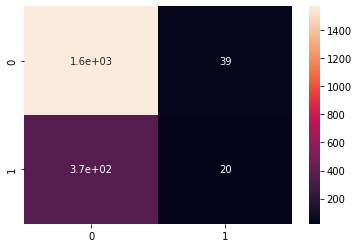

In [ ]:
#confusion matrix for logistic regression without scaling
cf_matrix_log = confusion_matrix(df_test.Exited, y_pred_log)
print(cf_matrix_log)
import seaborn as sns
sns.heatmap(cf_matrix_log, annot=True)

[[1513   97]
 [ 260  130]]


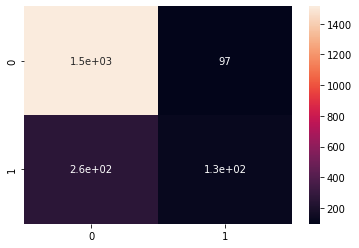

In [ ]:
#confusion matrix for logistic regression with scaling
cf_matrix_log = confusion_matrix(df_test.Exited, y_pred_log)
print(cf_matrix_log)
import seaborn as sns
sns.heatmap(cf_matrix_log, annot=True)

[[1610    0]
 [ 390    0]]


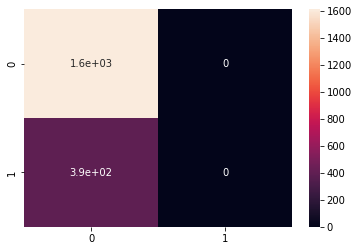

In [ ]:
#confusion matrix for svm without scaling
cf_matrix_svm = confusion_matrix(df_test.Exited, y_pred_svm)
print(cf_matrix_svm)
import seaborn as sns
sns.heatmap(cf_matrix_svm, annot=True)

[[1567   43]
 [ 239  151]]


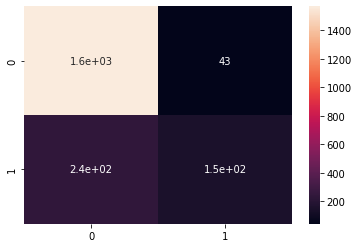

In [ ]:
#confusion matrix for svm with scaling
cf_matrix_svm = confusion_matrix(df_test.Exited, y_pred_svm)
print(cf_matrix_svm)
import seaborn as sns
sns.heatmap(cf_matrix_svm, annot=True)

[[1552   58]
 [ 216  174]]


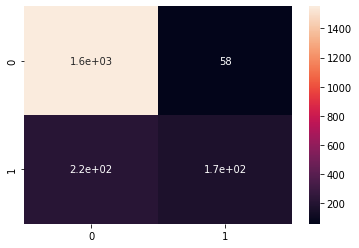

In [ ]:
#confusion matrix for random forest without scaling
cf_matrix_rf = confusion_matrix(df_test.Exited, y_pred_rf)
print(cf_matrix_rf)
import seaborn as sns
sns.heatmap(cf_matrix_rf, annot=True)

[[1549   61]
 [ 214  176]]


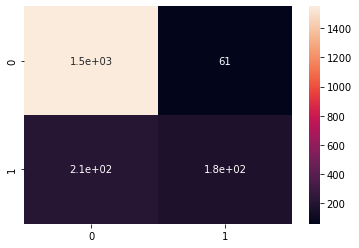

In [ ]:
#confusion matrix for random forest with scaling
cf_matrix_rf = confusion_matrix(df_test.Exited, y_pred_rf)
print(cf_matrix_rf)
import seaborn as sns
sns.heatmap(cf_matrix_rf, annot=True)

[[1544   66]
 [ 203  187]]


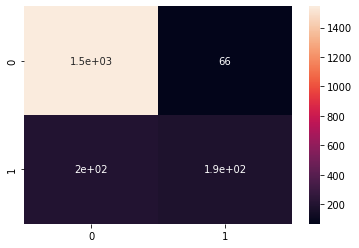

In [ ]:
#confusion matrix for xgboost without scaling
cf_matrix_xgb = confusion_matrix(df_test.Exited, y_pred_xgb)
print(cf_matrix_xgb)
import seaborn as sns
sns.heatmap(cf_matrix_xgb, annot=True)

[[1491  119]
 [ 186  204]]


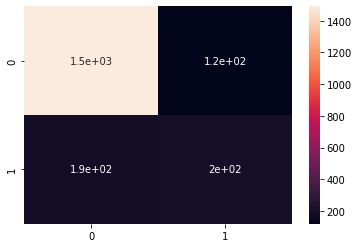

In [ ]:
#confusion matrix for xgboost with scaling
cf_matrix_xgb = confusion_matrix(df_test.Exited, y_pred_xgb)
print(cf_matrix_xgb)
import seaborn as sns
sns.heatmap(cf_matrix_xgb, annot=True)

In [ ]:
#logistic regression without scaling
print(classification_report(df_test.Exited, log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1610
           1       0.34      0.05      0.09       390

    accuracy                           0.80      2000
   macro avg       0.57      0.51      0.49      2000
weighted avg       0.72      0.80      0.73      2000



In [ ]:
#logistic regression with scaling
print(classification_report(df_test.Exited, log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1610
           1       0.57      0.33      0.42       390

    accuracy                           0.82      2000
   macro avg       0.71      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



In [ ]:
#support vector machine without scaling
print(classification_report(df_test.Exited, SVM_RBF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#support vector machine with scaling
print(classification_report(df_test.Exited, SVM_RBF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1610
           1       0.78      0.39      0.52       390

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
#random forest without scaling
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.75      0.45      0.56       390

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
#random forest with scaling
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.74      0.45      0.56       390

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
#xgboost without scaling
print(classification_report(df_test.Exited,  XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.74      0.48      0.58       390

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
#xgboost without scaling
print(classification_report(df_test.Exited,  XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1610
           1       0.63      0.52      0.57       390

    accuracy                           0.85      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

